In [1]:
from IPython.display import display
from vdom.helpers import h1, p, img, div, b, li, ul, h2, h3, h4, h5, a
from IPython.display import display, HTML

with open ("custom.css", "r") as myfile:
    custom_css = myfile.read().replace('\n', '')

title = '<h1>Olympic Games Analysis</h1>'
indexes = ({1: {'name': {'Introduction'}},
            2: {'name': {'Requirements'}},
            3: {'name': {'Data Cleaning'}},
            4: {'name': {'Male Analysis'}},
            5: {'name': {'Physique', 'Age', 'Winning Density based on physique'}},
            6: {'name': {'Female Analysis'}},
            7: {'name': {'Physique', 'Age', 'Winning Density based on physique'}},
            8: {'name': {'Gender Gap'}},
            9: {'name': {'Geographic Analysis'}},
            })
          
links =   ({1: {'link': {'#introduction'}},
            2: {'link': {'#requirements'}},
            3: {'link': {'#data_cleaning'}},
            4: {'link': {'#male_analysis'}},
            5: {'link': {'#physique_male', '#age_male', '#winning_male_density_physique'}},
            6: {'link': {'#female_analysis'}},
            7: {'link': {'#physique_female', '#age_female', '#winning_female_density_physique'}},
            8: {'link': {'#gender_gap'}},
            9: {'link': {'#geographic_analysis'}},
            })


def listIndex(indexes):
    html = custom_css
    html += title
    html += '<img src="img/olympics-animation.jpg">'
    html += '<ul class="unstyled">'
    
    for x in range(1, 9):
        try:
        
            index_len = len(indexes[x]['name'])
            if index_len > 1:
                html += '<ul>'
                pass
            for i, j in zip(indexes[x]['name'], links[x]['link']):
                html += '<li><a href="' + j + '">' + i + '</a></li>'
            if index_len > 1:
                html += '</ul>'
                pass
        except Exception:
            break
    html += '</ul>'
    
    return html

display(HTML(listIndex(indexes)))

<h1> Requirements </h1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [14]:

# Cumulative distribution function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    print(y)
    return x, y

In [15]:
dataset = pd.read_csv('datasets/athlete_events.csv')
dataset.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158381,79514,Juha Iisakki Mieto,M,34.0,197.0,100.0,Finland,FIN,1984 Winter,1984,Winter,Sarajevo,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,NaN
131799,66324,Frank Lars Gran Landqvist,M,17.0,NaN,NaN,Sweden,SWE,1952 Summer,1952,Summer,Helsinki,Diving,Diving Men's Springboard,NaN
73935,37572,Atsumi Fukumoto,F,24.0,169.0,57.0,Japan,JPN,2012 Summer,2012,Summer,London,Rowing,Rowing Women's Lightweight Double Sculls,NaN
255264,127790,Herbert Wachter,M,35.0,171.0,66.0,Austria,AUT,1976 Winter,1976,Winter,Innsbruck,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN
61260,31381,der Francis Carbonera,M,32.0,205.0,107.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Men's Volleyball,Gold


In [16]:
dataset.columns = dataset.columns.str.lower()
print(dataset.info())
print(dataset.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
id        271116 non-null int64
name      271116 non-null object
sex       271116 non-null object
age       261642 non-null float64
height    210945 non-null float64
weight    208241 non-null float64
team      271116 non-null object
noc       271116 non-null object
games     271116 non-null object
year      271116 non-null int64
season    271116 non-null object
city      271116 non-null object
sport     271116 non-null object
event     271116 non-null object
medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
None
Index(['id', 'name', 'sex', 'age', 'height', 'weight', 'team', 'noc', 'games',
       'year', 'season', 'city', 'sport', 'event', 'medal'],
      dtype='object')


In [17]:
dataset.describe()

,id,age,height,weight,year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


[3.68845808e-06 7.37691615e-06 1.10653742e-05 ... 9.99992623e-01
 9.99996312e-01 1.00000000e+00]


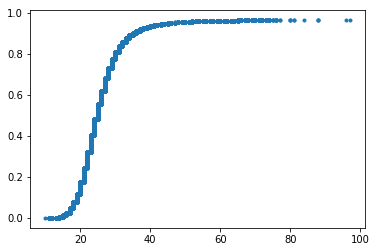

In [24]:
%matplotlib inline
x, y = ecdf(dataset['age'])
plt.plot(x, y, linestyle='none', marker='.')

In [19]:
dataset.isnull().sum()

id             0
name           0
sex            0
age         9474
height     60171
weight     62875
team           0
noc            0
games          0
year           0
season         0
city           0
sport          0
event          0
medal     231333
dtype: int64

In [20]:
print('Number of rows: ' + str(dataset.shape[0]))
print('Number of columns: ' + str(dataset.shape[1]))

Number of rows: 271116
Number of columns: 15


<h1> Frequency of Country Participation and Sport Activity </h1>

In [21]:
dataset.noc.value_counts(dropna=False).head()

USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
Name: noc, dtype: int64

In [22]:
dataset.sport.value_counts(dropna=False).head()

Athletics     38624
Gymnastics    26707
Swimming      23195
Shooting      11448
Cycling       10859
Name: sport, dtype: int64

<h1>Tidy Data</h1>

In [34]:
athlete_df = dataset[['name', 'team', 'noc']]

athlete_df = pd.melt(frame=athlete_df, id_vars='name', value_vars=['team', 'noc'], var_name='type', value_name='result')
athlete_df.head(5)

,name,type,result
0,A Dijiang,team,China
1,A Lamusi,team,China
2,Gunnar Nielsen Aaby,team,Denmark
3,Edgar Lindenau Aabye,team,Denmark/Sweden
4,Christine Jacoba Aaftink,team,Netherlands
